In [1]:
import pandas as pd
import seaborn as sns
sns.set()
import re
df = pd.read_csv("ssh_results.csv")
df.index = pd.to_datetime(df.timestamp)
df = df[df.index > "2023-11-15 12:20:00"]
df

,IP,time,output,timestamp
timestamp,,,,
2023-11-15 12:23:15.969614,130.216.216.179,10.875000,2023-11-14 23:20:02.056385: I tensorflow/core/...,2023-11-15 12:23:15.969614
2023-11-15 12:23:15.969614,130.216.216.196,10.882016,2023-11-15 12:20:02.072024: I tensorflow/core/...,2023-11-15 12:23:15.969614
2023-11-15 12:23:15.969614,130.216.216.78,98.380021,2023-11-14 23:20:01.911850: I tensorflow/core/...,2023-11-15 12:23:15.969614
2023-11-15 12:23:15.969614,130.216.217.127,10.859509,2023-11-15 12:20:01.951243: I tensorflow/core/...,2023-11-15 12:23:15.969614
2023-11-15 12:23:15.969614,130.216.216.117,10.981563,2023-11-15 12:20:02.191002: I tensorflow/core/...,2023-11-15 12:23:15.969614
2023-11-15 12:23:15.969614,130.216.217.118,194.689325,2023-11-14 23:20:02.151082: I tensorflow/core/...,2023-11-15 12:23:15.969614
2023-11-15 12:28:15.826631,130.216.216.179,10.949205,2023-11-14 23:25:02.200678: I tensorflow/core/...,2023-11-15 12:28:15.826631
2023-11-15 12:28:15.826631,130.216.216.196,10.965992,2023-11-15 12:25:02.140850: I tensorflow/core/...,2023-11-15 12:28:15.826631
2023-11-15 12:28:15.826631,130.216.216.78,98.332177,2023-11-14 23:25:02.018019: I tensorflow/core/...,2023-11-15 12:28:15.826631


In [2]:
# Extract some metrics from the output
def parse_time_to_seconds(time_str):
    minutes, seconds = map(float, time_str.split('m'))
    return minutes * 60 + seconds
df["nvidia-smi_time"] = df.output.str.extract(r'real\s+(.+)s')[0].apply(parse_time_to_seconds)
df["tf_devices_time"] = df.output.str.extract(r'Took (\d+)s').astype(int)
df["serials"] = df.output.str.findall(r'Serial Number\s*:\s*([^:]+)\n').apply(lambda s: ", ".join(s))
df["product names"] = df.output.str.findall("^    Product Name\s*:\s*([^:]+)$", re.MULTILINE).apply(lambda s: ", ".join(s))
df["persistence"] = df.output.str.extract(r'Persistence Mode\s*:\s*(.+)\n')
df["tf_detected_GPUs"] = df.output.str.findall(r"physical_device:(GPU:\d)', device_type='GPU'").str.len()
df

,IP,time,output,timestamp,nvidia-smi_time,tf_devices_time,serials,product names,persistence,tf_detected_GPUs
timestamp,,,,,,,,,,
2023-11-15 12:23:15.969614,130.216.216.179,10.875000,2023-11-14 23:20:02.056385: I tensorflow/core/...,2023-11-15 12:23:15.969614,0.119,0,1322122007252,NVIDIA A100 80GB PCIe,Enabled,1
2023-11-15 12:23:15.969614,130.216.216.196,10.882016,2023-11-15 12:20:02.072024: I tensorflow/core/...,2023-11-15 12:23:15.969614,0.120,0,1652422032676,NVIDIA A100 80GB PCIe,Enabled,1
2023-11-15 12:23:15.969614,130.216.216.78,98.380021,2023-11-14 23:20:01.911850: I tensorflow/core/...,2023-11-15 12:23:15.969614,87.588,96,1322822261453,Unknown Error,Enabled,0
2023-11-15 12:23:15.969614,130.216.217.127,10.859509,2023-11-15 12:20:01.951243: I tensorflow/core/...,2023-11-15 12:23:15.969614,0.213,0,"1652422032681, 1322122007042","NVIDIA A100 80GB PCIe, NVIDIA A100 80GB PCIe",Enabled,2
2023-11-15 12:23:15.969614,130.216.216.117,10.981563,2023-11-15 12:20:02.191002: I tensorflow/core/...,2023-11-15 12:23:15.969614,0.274,0,"1323022014403, 1323022014449","NVIDIA A100 80GB PCIe, NVIDIA A100 80GB PCIe",Enabled,2
2023-11-15 12:23:15.969614,130.216.217.118,194.689325,2023-11-14 23:20:02.151082: I tensorflow/core/...,2023-11-15 12:23:15.969614,183.876,192,1323022015019,NVIDIA A100 80GB PCIe,Enabled,0
2023-11-15 12:28:15.826631,130.216.216.179,10.949205,2023-11-14 23:25:02.200678: I tensorflow/core/...,2023-11-15 12:28:15.826631,0.119,0,1322122007252,NVIDIA A100 80GB PCIe,Enabled,1
2023-11-15 12:28:15.826631,130.216.216.196,10.965992,2023-11-15 12:25:02.140850: I tensorflow/core/...,2023-11-15 12:28:15.826631,0.138,0,1652422032676,NVIDIA A100 80GB PCIe,Enabled,1
2023-11-15 12:28:15.826631,130.216.216.78,98.332177,2023-11-14 23:25:02.018019: I tensorflow/core/...,2023-11-15 12:28:15.826631,87.500,96,1322822261453,Unknown Error,Enabled,0


In [3]:
df[df.serials == "1322822261453"]

,IP,time,output,timestamp,nvidia-smi_time,tf_devices_time,serials,product names,persistence,tf_detected_GPUs
timestamp,,,,,,,,,,
2023-11-15 12:23:15.969614,130.216.216.78,98.380021,2023-11-14 23:20:01.911850: I tensorflow/core/...,2023-11-15 12:23:15.969614,87.588,96,1322822261453,Unknown Error,Enabled,0
2023-11-15 12:28:15.826631,130.216.216.78,98.332177,2023-11-14 23:25:02.018019: I tensorflow/core/...,2023-11-15 12:28:15.826631,87.500,96,1322822261453,Unknown Error,Enabled,0
2023-11-15 12:33:16.936067,130.216.216.78,98.263673,2023-11-14 23:30:02.786933: I tensorflow/core/...,2023-11-15 12:33:16.936067,87.500,96,1322822261453,NVIDIA A100 80GB PCIe,Enabled,0
2023-11-15 12:38:16.938510,130.216.216.78,98.288401,2023-11-14 23:35:02.903870: I tensorflow/core/...,2023-11-15 12:38:16.938510,87.516,96,1322822261453,Unknown Error,Enabled,0
2023-11-15 12:43:16.183741,130.216.216.78,98.102042,2023-11-14 23:40:02.154929: I tensorflow/core/...,2023-11-15 12:43:16.183741,87.497,90,1322822261453,Unknown Error,Enabled,0
2023-11-15 12:48:16.321605,130.216.216.78,98.249913,2023-11-14 23:45:02.201638: I tensorflow/core/...,2023-11-15 12:48:16.321605,87.478,96,1322822261453,NVIDIA A100 80GB PCIe,Enabled,0
2023-11-15 12:53:16.501810,130.216.216.78,98.067228,2023-11-14 23:50:02.326953: I tensorflow/core/...,2023-11-15 12:53:16.501810,87.461,90,1322822261453,NVIDIA A100 80GB PCIe,Enabled,0
2023-11-15 12:58:16.656435,130.216.216.78,98.507067,2023-11-14 23:55:02.672987: I tensorflow/core/...,2023-11-15 12:58:16.656435,87.491,96,1322822261453,NVIDIA A100 80GB PCIe,Enabled,0
2023-11-15 13:03:16.717634,130.216.216.78,98.513624,2023-11-15 00:00:02.770195: I tensorflow/core/...,2023-11-15 13:03:16.717634,87.589,96,1322822261453,NVIDIA A100 80GB PCIe,Enabled,0


serials
1322122007252                   AxesSubplot(0.125,0.2;0.775x0.68)
1322822261453                   AxesSubplot(0.125,0.2;0.775x0.68)
1323022014403, 1323022014449    AxesSubplot(0.125,0.2;0.775x0.68)
1323022015019                   AxesSubplot(0.125,0.2;0.775x0.68)
1652422032676                   AxesSubplot(0.125,0.2;0.775x0.68)
1652422032681, 1322122007042    AxesSubplot(0.125,0.2;0.775x0.68)
Name: nvidia-smi_time, dtype: object

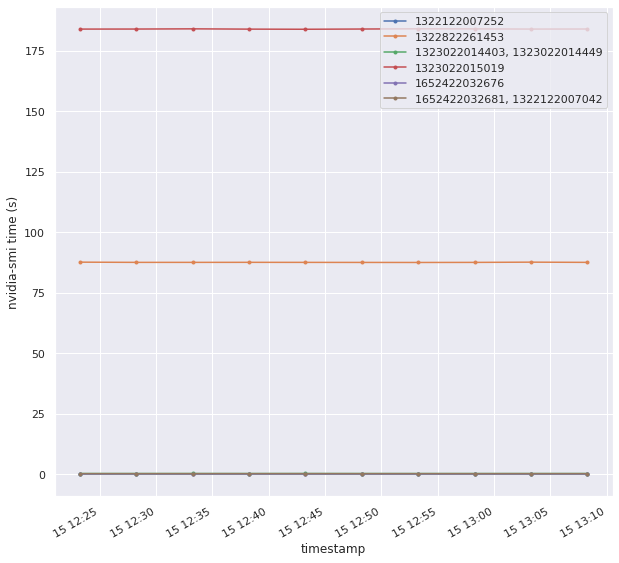

In [4]:
df.groupby("serials")["nvidia-smi_time"].plot(legend=True, figsize=(10,10), style=".-", ylabel="nvidia-smi time (s)")